In [1]:
import numpy as np
import matplotlib.pyplot as plt

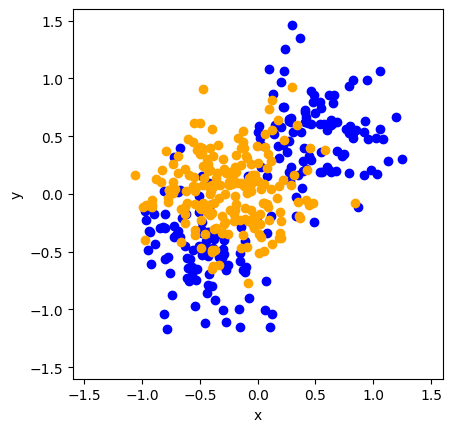

In [28]:
# set up training data for two classes
# first class is centered around two gaussians in opposite quadrants
n1 = 100
mu_x1 = -0.5
mu_y1 = -0.5
sig_x1 = 0.3
sig_y1 = 0.3

# random sampling of x 
x1rng = np.random.default_rng(seed=557)
x1 = x1rng.normal(loc=mu_x1,scale=sig_x1,size=n1)

# random sampling of y 
y1rng = np.random.default_rng(seed=29)
y1 = y1rng.normal(loc=mu_y1,scale=sig_y1,size=n1)

n2 = 100
mu_x2 = -mu_x1
mu_y2 = -mu_y1
sig_x2 = 0.3
sig_y2 = 0.3

# random sampling of x 
x2rng = np.random.default_rng(seed=76)
x2 = x2rng.normal(loc=mu_x2,scale=sig_x2,size=n2)

# random sampling of y 
y2rng = np.random.default_rng(seed=712)
y2 = y2rng.normal(loc=mu_y2,scale=sig_y2,size=n2)

# merge with data from first Gaussian
x1 = np.concatenate((x1,x2))
y1 = np.concatenate((y1,y2))

# second class is centered around gaussian closer to the origin
n3 = 200
mu_x3 = -0.25
mu_y3 = 0.0
sig_x3 = 0.3
sig_y3 = 0.3

# random sampling of x 
x3rng = np.random.default_rng(seed=434)
x3 = x3rng.normal(loc=mu_x3,scale=sig_x3,size=n3)

# random sampling of y 
y3rng = np.random.default_rng(seed=129)
y3 = y3rng.normal(loc=mu_y3,scale=sig_y3,size=n3)

# define datasets
n = np.size(x1) + np.size(x3)
data1 = np.vstack((x1,y1,np.zeros(200))).T
data2 = np.vstack((x3,y3,np.ones(200))).T
data = np.concatenate((data1,data2))

# make plots
plt.scatter(x1,y1, c="blue")
plt.scatter(x3,y3, c="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -1.6 , right = 1.6)
plt.gca().set_ylim(bottom = -1.6 , top = 1.6)
plt.show()

[ 0.39547243 -0.37237146 -0.7576058 ]
[-0.27416168 -1.94591104  1.48939503]


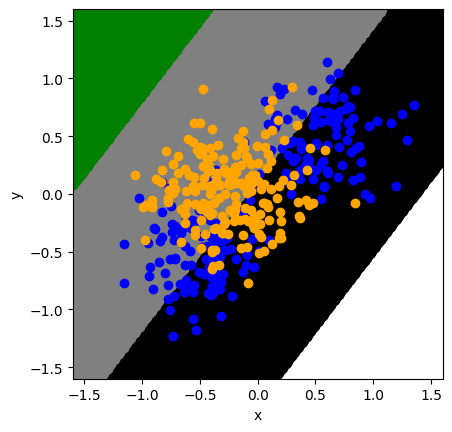

In [8]:
# set up logistic regression
epochs = 10000
nlog = epochs*n
datalogrng = np.random.default_rng(seed=31)
datalog = datalogrng.choice(data, nlog)

# stcohastic gradient decent with learning rate
eta = 0.001  

# randomly initialize weights
wrng = np.random.default_rng(seed=27)
w = (wrng.random(3)*2)-1

# keep record of weights for each iteration
wRec = np.zeros((nlog+1,3))
wRec[0] = w

# sum bias and weighted linear input, logistic activation function for output
def yhatlog(x,wCol):
    sum = wCol[0] + (wCol[1]*x[0]) + (wCol[2]*x[1])
    return 1/(1 + np.exp(-sum))

for i in range(nlog):
    # forward propagation
    yhat = yhatlog(datalog[i],w)

    # calculate gradient and adjust weights
    delFin = yhat - datalog[i,2]
    w[0] += -eta*delFin
    w[1] += -eta*delFin*datalog[i,0]
    w[2] += -eta*delFin*datalog[i,1]
    
    wRec[i+1] = w

print(wRec[0])
print(w)

# now map decision regions
xgrid =  np.linspace(-1.6, 1.6, 300)
ygrid =  np.linspace(-1.6, 1.6, 300)

threshA = 0.05
class2xA = []
class2yA = []

threshB = 0.5
class2xB = []
class2yB = []

threshC = 0.95
class2xC = []
class2yC = []

for i in range(xgrid.size):   
    for j in range(ygrid.size):
        yhat = yhatlog(np.array([xgrid[i],ygrid[j]]),w)
        if yhat > threshA:
            class2xA.append(xgrid[i])
            class2yA.append(ygrid[j])

            if yhat > threshB:
                class2xB.append(xgrid[i])
                class2yB.append(ygrid[j])

                if yhat > threshC:
                    class2xC.append(xgrid[i])
                    class2yC.append(ygrid[j])

class2xAarr = np.array(class2xA)
class2yAarr = np.array(class2yA)

class2xBarr = np.array(class2xB)
class2yBarr = np.array(class2yB)

class2xCarr = np.array(class2xC)
class2yCarr = np.array(class2yC)

# make plots
plt.scatter(class2xAarr,class2yAarr, c="black")
plt.scatter(class2xBarr,class2yBarr, c="grey")
plt.scatter(class2xCarr,class2yCarr, c="green")
plt.scatter(x1,y1, c="blue")
plt.scatter(x3,y3, c="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -1.6 , right = 1.6)
plt.gca().set_ylim(bottom = -1.6 , top = 1.6)
plt.show()

[[ 0.67567347 -0.98664975 -0.53710349 -0.77152891  0.4311666  -0.37909004
   0.14661568 -0.89621831 -0.41736616  0.90718099  0.81514315 -0.30347254
   0.36691279 -0.09447631  0.01724473  0.12645452  0.54450098  0.03737008
   0.57429736 -0.66141621]
 [ 0.9281474  -0.76827205  0.52579801  0.11460151 -0.87968109 -0.05560748
  -0.02397401  0.92618369 -0.21414583 -0.6266054  -0.14012862 -0.36462537
  -0.10450254  0.7598714  -0.87228503 -0.93983344  0.28531272  0.9194787
  -0.73846623  0.39305529]
 [-0.93667972 -0.02385092 -0.10693938  0.09512246 -0.2942534  -0.45699484
   0.65377657  0.61314976 -0.72019166 -0.3272157   0.05889569  0.20625801
   0.48968962 -0.83833227  0.69884677  0.7430216   0.98348733  0.74116622
   0.64026561 -0.7637255 ]]
[[ 0.81260136 -1.13495987 -0.87691452 -0.81936247  0.9403389  -0.52209749
   0.47091711 -0.92397176 -0.61057035  0.90778099  0.95627231 -0.50432182
   0.54183923 -0.14130329 -0.19338901  0.11018951  1.50702309 -0.80965161
   0.74552131 -0.77719254]
 [ 0

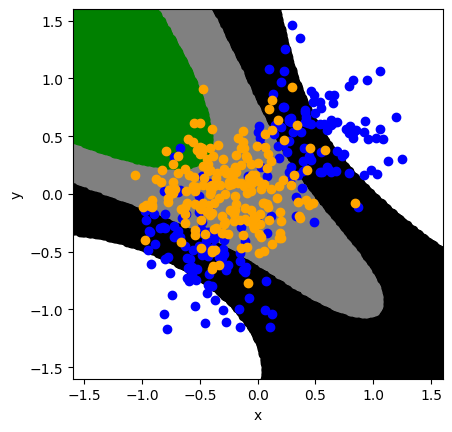

In [30]:
# set up neural net
epochs = 1000
nNN = epochs*n
dataNNrng = np.random.default_rng(seed=41)
dataNN = dataNNrng.choice(data, nNN)

# train NN with learning rate
eta = 0.001

# set up two-layer MLP with more hidden nodes
nodes = 20  

# randomly initialize weights
w1rng = np.random.default_rng(seed=72)
w1 = (w1rng.random((3,nodes))*2)-1
w2rng = np.random.default_rng(seed=732)
w2 = (w2rng.random(nodes+1)*2)-1

# keep record of weights for each interation
w1Rec = np.zeros((nNN+1,3,nodes))
w1Rec[0] = w1
w2Rec = np.zeros((nNN+1,nodes+1))
w2Rec[0] = w2

for i in range(nNN):
    # forward propagation
    z = np.zeros(nodes+1)  
    z[0] = 1
    sum = w2[0]
    for j in range(1,nodes+1):
        a = w1[0,j-1]+(w1[1,j-1]*dataNN[i,0])+(w1[2,j-1]*dataNN[i,1])
        z[j] = np.tanh(a)
        sum += w2[j]*z[j]

    # start backprop with error of final prediction
    delFin = (1/(1 + np.exp(-sum))) - dataNN[i,2]
    for j in range(nodes+1):        
        # update second layer
        w2[j] += -eta*delFin*z[j]
        # get error for hidden unit
        delHid = (1-(z[j]**2))*w2[j]*delFin
        # now first layer
        if (j>0):
            w1[0,j-1] += -eta*delHid
            w1[1,j-1] += -eta*delHid*dataNN[i,0]
            w1[2,j-1] += -eta*delHid*dataNN[i,1]
        
    w1Rec[i+1] = w1
    w2Rec[i+1] = w2

# each node takes bias and weighted linear input, sum nodes plus second bias for output
def yhatNN(x,w1Col,w2Col):
    sum = w2Col[0]
    for j in range(1,np.size(w2Col)):
        sum += w2Col[j]*np.tanh(w1Col[0,j-1]+(w1Col[1,j-1]*x[0])+(w1Col[2,j-1]*x[1]))
    return 1/(1 + np.exp(-sum))

print(w1Rec[0])
print(w1)
print(w2Rec[0])
print(w2)

# now map decision regions
xgrid =  np.linspace(-1.6, 1.6, 300)
ygrid =  np.linspace(-1.6, 1.6, 300)

threshA = 0.05
class2xA = []
class2yA = []

threshB = 0.5
class2xB = []
class2yB = []

threshC = 0.95
class2xC = []
class2yC = []

for i in range(xgrid.size):   
    for j in range(ygrid.size):
        yhat = yhatNN(np.array([xgrid[i],ygrid[j]]),w1,w2)
        if yhat > threshA:
            class2xA.append(xgrid[i])
            class2yA.append(ygrid[j])

            if yhat > threshB:
                class2xB.append(xgrid[i])
                class2yB.append(ygrid[j])

                if yhat > threshC:
                    class2xC.append(xgrid[i])
                    class2yC.append(ygrid[j])

class2xAarr = np.array(class2xA)
class2yAarr = np.array(class2yA)

class2xBarr = np.array(class2xB)
class2yBarr = np.array(class2yB)

class2xCarr = np.array(class2xC)
class2yCarr = np.array(class2yC)

# make plots
plt.scatter(class2xAarr,class2yAarr, c="black")
plt.scatter(class2xBarr,class2yBarr, c="grey")
plt.scatter(class2xCarr,class2yCarr, c="green")
plt.scatter(x1,y1, c="blue")
plt.scatter(x3,y3, c="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -1.6 , right = 1.6)
plt.gca().set_ylim(bottom = -1.6 , top = 1.6)
plt.show()      

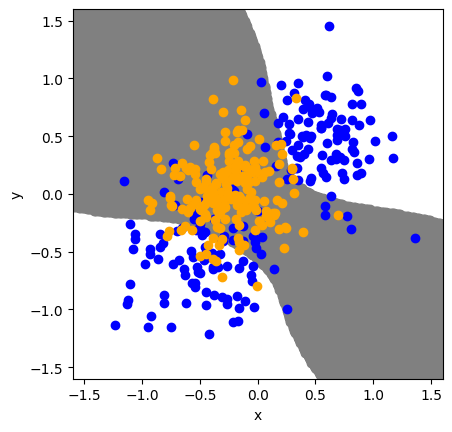

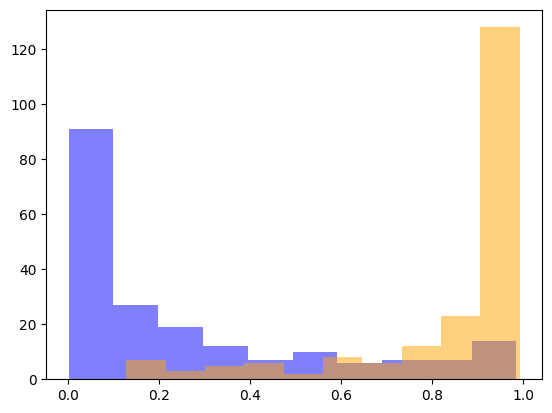

In [26]:
# get test data to see how well model generalizes
# random sampling of x 
x1testrng = np.random.default_rng()
x1test = x1testrng.normal(loc=mu_x1,scale=sig_x1,size=n1)

# random sampling of y 
y1testrng = np.random.default_rng()
y1test = y1testrng.normal(loc=mu_y1,scale=sig_y1,size=n1)

# random sampling of x 
x2testrng = np.random.default_rng()
x2test = x2testrng.normal(loc=mu_x2,scale=sig_x2,size=n2)

# random sampling of y 
y2testrng = np.random.default_rng()
y2test = y2testrng.normal(loc=mu_y2,scale=sig_y2,size=n2)

# merge with data from first Gaussian
x1test = np.concatenate((x1test,x2test))
y1test = np.concatenate((y1test,y2test))

# random sampling of x 
x3testrng = np.random.default_rng()
x3test = x3testrng.normal(loc=mu_x3,scale=sig_x3,size=n3)

# random sampling of y 
y3testrng = np.random.default_rng()
y3test = y3testrng.normal(loc=mu_y3,scale=sig_y3,size=n3)

# define test datasets
n1test = n1 + n2
n2test = n3
data1test = np.vstack((x1test,y1test)).T
data2test = np.vstack((x3test,y3test)).T

# plot distributions of scores for test data
score1 = np.zeros(n1test)
for i in range(n1test):
    score1[i] = yhatNN(data1test[i],w1,w2)

score2 = np.zeros(n2test)
for i in range(n2test):
    score2[i] = yhatNN(data2test[i],w1,w2)

# make plots
plt.scatter(class2xBarr,class2yBarr, c="grey")
plt.scatter(x1test,y1test, c="blue")
plt.scatter(x3test,y3test, c="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.gca().set_xlim(left = -1.6 , right = 1.6)
plt.gca().set_ylim(bottom = -1.6 , top = 1.6)
plt.show()

plt.hist(score1, alpha=0.5, color='blue')
plt.hist(score2, alpha=0.5, color='orange')
plt.show()